# Proyecto final

por: Daniel Sierra Botero

CC: 1152216176

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Datos

Los datos a analizar consisten en respuestas dadas por empleados de diferentes empresas a una encuesta sobre temas relacionados con la calidad del ambiente y las condiciones laborales, cada “pregunta” consiste en una afirmación donde los empleados deben calificar que tan a menudo sienten que esta se cumple siguiendo una escala tipo Likert (‘Casi Nunca es Verdad’, ‘Pocas veces es Verdad’, ‘A veces es Verdad, a veces no’, ‘Frecuentemente es Verdad’, ‘Casi Siempre es Verdad’).

In [3]:
gts =  pd.read_excel("Datos_GTS.xlsx")

In [4]:
gts

,pregunta00,pregunta01,pregunta02,pregunta03,pregunta04,pregunta05,pregunta06,pregunta07,pregunta08,pregunta09,...,pregunta90,pregunta91,pregunta92,pregunta93,pregunta94,pregunta95,pregunta96,pregunta97,pregunta98,pregunta99
0,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,...,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,"A veces es Verdad, a veces no",Casi Siempre es Verdad,Casi Siempre es Verdad
1,Frecuentemente es Verdad,"A veces es Verdad, a veces no",Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,...,"A veces es Verdad, a veces no",Casi Siempre es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Pocas veces es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad
2,Casi Siempre es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Casi Siempre es Verdad,"A veces es Verdad, a veces no",Frecuentemente es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,...,Casi Nunca es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Pocas veces es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad
3,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,...,Frecuentemente es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Casi Siempre es Verdad,"A veces es Verdad, a veces no",Casi Siempre es Verdad,Casi Siempre es Verdad
4,Frecuentemente es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,...,Frecuentemente es Verdad,Frecuentemente es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Casi Siempre es Verdad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,Pocas veces es Verdad,Frecuentemente es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Pocas veces es Verdad,Frecuentemente es Verdad,...,Casi Nunca es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Pocas veces es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Pocas veces es Verdad,Pocas veces es Verdad,Frecuentemente es Verdad
1623,"A veces es Verdad, a veces no",Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,...,Frecuentemente es Verdad,Casi Siempre es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad
1624,Casi Siempre es Verdad,"A veces es Verdad, a veces no",Casi Siempre es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Casi Siempre es Verdad,Frecuentemente es Verdad,Frecuentemente es Verdad,

Se pasan los datos a una escala numérica entre -2 y 2 para poder hacer un análisis de estas respuestas.

In [5]:
respuestas = {'Casi Nunca es Verdad':-2, 'Pocas veces es Verdad':-1,
              'A veces es Verdad, a veces no':0,'Frecuentemente es Verdad':1, 'Casi Siempre es Verdad':2}
gts = gts.replace(respuestas)

In [6]:
gts

,pregunta00,pregunta01,pregunta02,pregunta03,pregunta04,pregunta05,pregunta06,pregunta07,pregunta08,pregunta09,...,pregunta90,pregunta91,pregunta92,pregunta93,pregunta94,pregunta95,pregunta96,pregunta97,pregunta98,pregunta99
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,0,2,2
1,1,0,1,1,1,1,1,2,1,1,...,0,2,1,1,-1,1,1,1,1,1
2,2,1,1,1,2,0,1,2,1,1,...,-2,2,2,1,1,-1,2,2,1,1
3,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,1,2,0,2,2
4,1,2,2,2,2,2,2,2,2,2,...,1,1,2,2,1,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,-1,1,2,1,2,1,1,1,-1,1,...,-2,1,1,-1,1,1,1,-1,-1,1
1623,0,1,1,1,1,1,1,1,1,1,...,1,2,2,1,1,1,1,1,1,1
1624,2,0,2,2,1,2,1,2,1,1,...,-1,2,1,1,0,2,2,2,1,1
1625,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


Se comprueba que no haya datos nulos que deban ser tratados

In [113]:
pd.set_option('display.max_rows', gts.shape[1])
gts.isnull().sum()

pregunta00    0
pregunta01    0
pregunta02    0
pregunta03    0
pregunta04    0
pregunta05    0
pregunta06    0
pregunta07    0
pregunta08    0
pregunta09    0
pregunta10    0
pregunta11    0
pregunta12    0
pregunta13    0
pregunta14    0
pregunta15    0
pregunta16    0
pregunta17    0
pregunta18    0
pregunta19    0
pregunta20    0
pregunta21    0
pregunta22    0
pregunta23    0
pregunta24    0
pregunta25    0
pregunta26    0
pregunta27    0
pregunta28    0
pregunta29    0
pregunta30    0
pregunta31    0
pregunta32    0
pregunta33    0
pregunta34    0
pregunta35    0
pregunta36    0
pregunta37    0
pregunta38    0
pregunta39    0
pregunta40    0
pregunta41    0
pregunta42    0
pregunta43    0
pregunta44    0
pregunta45    0
pregunta46    0
pregunta47    0
pregunta48    0
pregunta49    0
pregunta50    0
pregunta51    0
pregunta52    0
pregunta53    0
pregunta54    0
pregunta55    0
pregunta56    0
pregunta57    0
pregunta58    0
pregunta59    0
pregunta60    0
pregunta61    0
pregunta

## Reducción de dimensionalidad (PCA)

Como en este caso estamos tratando con un número muy alto de características (100 preguntas del cuestionario) y probablemente muchas de estas están altamente correlacionadas entre sí debido a la forma en la que están planteadas, procedemos a realizar un proceso de reducción de dimensionalidad para obtener las características que mejor describen el conjunto de datos.

Para esto utilizaremos el método conocido como Principal Component Analysis, este consiste en obtener la matriz de covarianza de las coordenadas que describen el problema a partir del conjunto de datos que se tiene.

Esta se diagonaliza obteniendo sus respectivos autovalores y autovectores y con esto se obtiene la matriz de transformación a un nuevo sistema coordenado donde la matriz de covarianza es diagonal y por lo tanto la covarianza entre estas nuevas coordenadas es nula y la varianza que describen estas es maxima.

![pca](pca.jpg)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()

gts_pca = pd.DataFrame(pca.fit_transform(gts))

In [9]:
gts_pca

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-8.795462,-0.168801,0.042381,0.984802,-0.362819,-0.182281,0.201786,-0.650563,0.300343,-1.199058,...,0.008631,-0.036218,0.065767,0.032341,0.039661,-0.004684,0.008653,-0.015576,0.021070,0.047384
1,0.075091,-0.918972,-1.339917,-0.683869,-1.557992,-0.344150,-0.160961,0.642272,-0.251221,0.632464,...,0.081313,0.152773,-0.193103,-0.155185,0.157937,0.554930,-0.616619,-0.154888,-0.576601,-0.592298
2,4.380304,-2.757440,1.576038,-2.011687,-1.966464,-1.444601,0.405198,0.569422,1.702257,-1.434739,...,0.182877,-0.468919,-0.675667,-0.433915,-0.432123,-1.199886,0.119102,0.021151,-0.522416,-0.131284
3,-7.318914,1.099971,1.042024,-1.017318,-0.286570,-0.693395,-0.551133,-0.746052,0.025575,-1.080713,...,-0.093468,-0.044715,0.141195,-0.012502,-0.158325,-0.196117,0.009291,-0.042101,0.044534,0.072808
4,-4.928615,-1.188906,-1.598232,-0.345608,-0.563274,-0.181218,0.820574,0.721945,-0.354151,0.623571,...,0.263191,-0.638551,-0.478032,-0.040716,-0.513590,-0.091307,-0.152482,0.059734,0.268158,-0.025352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,8.691476,-2.320558,-1.951541,-2.921634,1.220813,2.556085,0.963265,1.169078,-1.309632,2.925134,...,-0.158086,-1.367328,0.566293,0.599096,-0.779676,0.071472,-0.700283,-0.332141,-0.627426,-0.475162
1623,-0.528233,0.380707,-0.555252,0.568566,-1.599994,-0.807765,-0.454977,0.791771,-0.806822,1.013377,...,0.764023,-0.675307,0.161431,0.026397,-0.461315,-0.192683,-0.778344,-0.153185,-0.210248,-0.487366
1624,-0.492664,-2.688797,-1.424008,-1.510783,-0.009960,-1.690398,-0.265096,1.126351,0.419465,0.962576,...,-0.098065,-0.268088,-0.231525,-0.128055,0.200091,0.341497,-0.198294,0.908535,0.766615,0.139248
1625,-8.217927,-0.434040,0.006604,0.351865,-0.576365,-2.113376,0.927688,2.311909,0.201919,-0.062335,...,0.031960,-0.026894,0.159742,0.011380,-0.089357,0.039711,0.022668,-0.077208,0.101706,-0.141512


Se grafica la varianza porcentual y su acumulado en función del nuevo conjunto de coordenadas para seleccionar la cantidad de características que mejor describen al sistema.

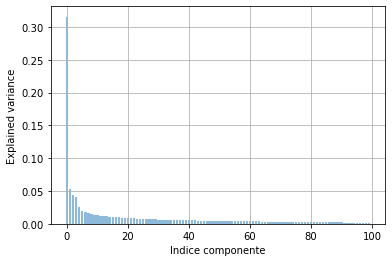

In [115]:
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.bar(np.arange(0,100), var_exp, alpha=0.5, align='center')
plt.ylabel('Explained variance')
plt.xlabel('Indice componente')
plt.grid()
plt.show()

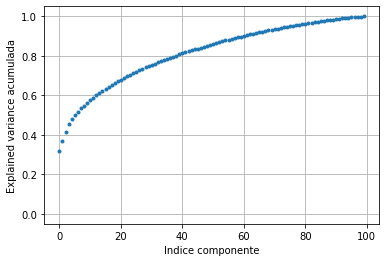

In [118]:
plt.plot(np.arange(0,100), cum_var_exp, '.')
plt.plot(0,0,'')
plt.ylabel('Explained variance acumulada')
plt.xlabel('Indice componente')
plt.grid()
plt.show()

En este caso se toman las primeras 10 características que nos permiten describir el sistema con una varianza porcentual acumulada de aproximadamente 0.56.

In [44]:
X_gts = gts_pca.iloc[:,0:10]
X_gts

,0,1,2,3,4,5,6,7,8,9
0,-8.795462,-0.168801,0.042381,0.984802,-0.362819,-0.182281,0.201786,-0.650563,0.300343,-1.199058
1,0.075091,-0.918972,-1.339917,-0.683869,-1.557992,-0.344150,-0.160961,0.642272,-0.251221,0.632464
2,4.380304,-2.757440,1.576038,-2.011687,-1.966464,-1.444601,0.405198,0.569422,1.702257,-1.434739
3,-7.318914,1.099971,1.042024,-1.017318,-0.286570,-0.693395,-0.551133,-0.746052,0.025575,-1.080713
4,-4.928615,-1.188906,-1.598232,-0.345608,-0.563274,-0.181218,0.820574,0.721945,-0.354151,0.623571
...,...,...,...,...,...,...,...,...,...,...
1622,8.691476,-2.320558,-1.951541,-2.921634,1.220813,2.556085,0.963265,1.169078,-1.309632,2.925134
1623,-0.528233,0.380707,-0.555252,0.568566,-1.599994,-0.807765,-0.454977,0.791771,-0.806822,1.013377
1624,-0.492664,-2.688797,-1.424008,-1.510783,-0.009960,-1.690398,-0.265096,1.126351,0.419465,0.962576
1625,-8.217927,-0.434040,0.006604,0.351865,-0.576365,-2.113376,0.927688,2.311909,0.201919,-0.062335


## Visualización de los datos con el nuevo conjunto de coordenadas.

In [128]:
from pandas.plotting import scatter_matrix, parallel_coordinates

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>]], dtype=object)

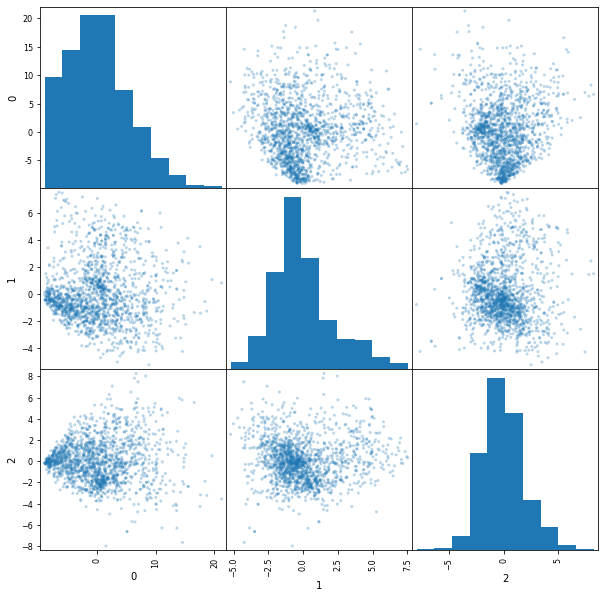

In [129]:
scatter_matrix(X_gts.iloc[:,0:3], figsize = (10,10), alpha=0.3)

## Clustering

La idea con este conjunto de datos es analizar si se pueden encontrar grupos de empleados que compartan patrones de respuestas similares, además se puede observar en las gráficas obtenidas que existen zonas del espacio de configuración con densidades de puntos más altas que otras por lo que se puede intuir que se puede realizar algún tipo de agrupación.

Dada la distribución que presentan los datos se decidió utilizar el modelo Gaussian Mixture ya que este, como su nombre lo indica, basa su modelo de clusterización en proponer un número $k$ de gaussianas $N_{dimensionales}$ con pesos probabilísticos $\pi_k$ para describir la distribución de los datos.

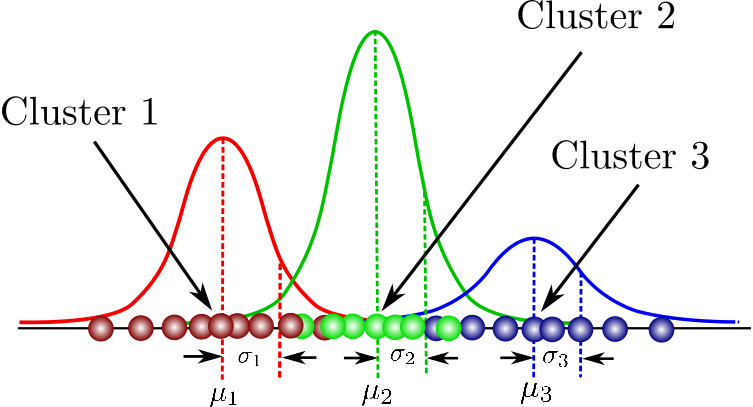

Las principales ventajas de este método es que tiene en cuenta la correlación de los subconjuntos de datos por lo que los clusters obtenidos no se limitan a hiperesferas dentro del espacio de configuración (a diferencia de métodos como el k means), además este no presenta fronteras definidas donde cada punto pertenece a un cluster en concreto, sino que permite obtener las probabilidades de que dado un punto este pertenezca a cada uno de los clusters lo que permite un mejor análisis en conjuntos de datos como el que estamos estudiando.

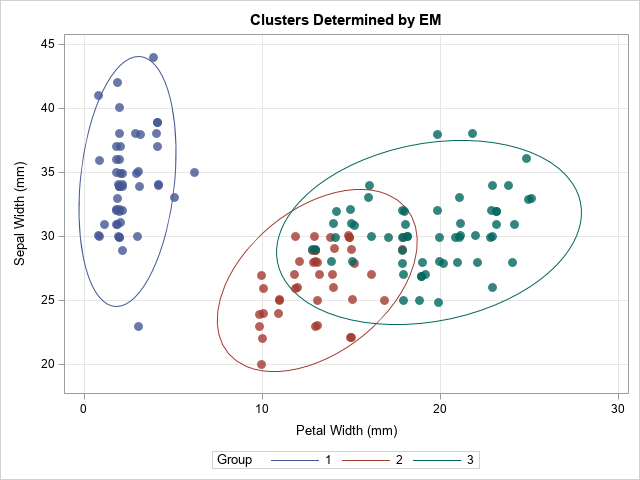

In [16]:
from sklearn.mixture import GaussianMixture

En este caso como no se conoce la cantidad de gaussianas que mejor describen el sistema se entrena el modelo para clasificar los datos desde 2 grupos hasta 8.

In [17]:
categories_gm = np.array([])

for i in range(10):
    
    clustering_gm = GaussianMixture(i+1)
    clustering_gm.fit(X_gts)
    
    categories_gm = np.append(categories_gm, clustering_gm.predict(X_gts))

In [18]:
categories_gm = categories_gm.reshape((10,X_gts.shape[0]))

Dado que no tenemos una forma cuantitativa de calificar cada uno de estos modelos ya que contamos con un conjunto de datos no supervisados lo mejor que se puede hacer en este caso es realizar un análisis gráfico de los clusters obtenidos con cada modelo (el analisis se encuentra en una presentación a parte para organizar mejor las graficas y no saturar el notebook).

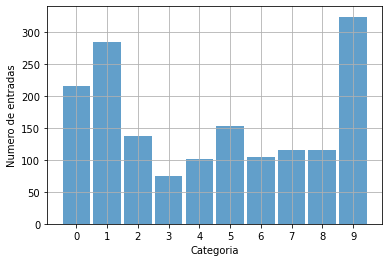

In [20]:
plt.hist(categories_gm[9], [0,1,2,3,4,5,6,7,8,9,10], rwidth=0.9, alpha=0.7)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5], ['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel('Categoria')
plt.ylabel('Numero de entradas')
plt.grid()

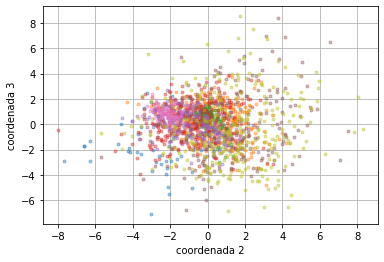

In [39]:
X_0 = X_gts[categories_gm[7]==0]
X_1 = X_gts[categories_gm[7]==1]
X_2 = X_gts[categories_gm[7]==2]
X_3 = X_gts[categories_gm[7]==3]
X_4 = X_gts[categories_gm[7]==4]
X_5 = X_gts[categories_gm[7]==5]
X_6 = X_gts[categories_gm[7]==6]
X_7 = X_gts[categories_gm[7]==7]

plt.plot(X_0[2],X_0[3],'.',alpha=0.4)
plt.plot(X_1[2],X_1[3],'.',alpha=0.4)
plt.plot(X_2[2],X_2[3],'.',alpha=0.4)
plt.plot(X_3[2],X_3[3],'.',alpha=0.4)
plt.plot(X_4[2],X_4[3],'.',alpha=0.4)
plt.plot(X_5[2],X_5[3],'.',alpha=0.4)
plt.plot(X_6[2],X_6[3],'.',alpha=0.4)
plt.plot(X_7[2],X_7[3],'.',alpha=0.4,color='tab:olive')
plt.xlabel('coordenada 2')
plt.ylabel('coordenada 3')
plt.grid()

In [47]:
X_gm = X_gts.copy(deep=False)
X_gm['clase'] = categories_gm[0]

X_1 = X_gts.copy(deep=False)
X_1['clase'] = categories_gm[1]
X_2 = X_gts.copy(deep=False)
X_2['clase'] = categories_gm[2]
X_3 = X_gts.copy(deep=False)
X_3['clase'] = categories_gm[3]
X_4 = X_gts.copy(deep=False)
X_4['clase'] = categories_gm[4]
X_5 = X_gts.copy(deep=False)
X_5['clase'] = categories_gm[5]
X_6 = X_gts.copy(deep=False)
X_6['clase'] = categories_gm[6]
X_7 = X_gts.copy(deep=False)
X_7['clase'] = categories_gm[7]

In [61]:
colors = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive')

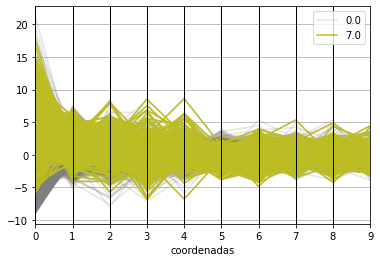

In [130]:
parallel_coordinates(X_gm, class_column='clase', alpha=0.2, color=('tab:gray'), sort_labels=True)
parallel_coordinates(X_7[X_7['clase']==7], class_column='clase', alpha=1, color=colors[7], sort_labels=True)
plt.xlabel('coordenadas')
plt.grid()

## Otros modelos

También se aplicaron otros 2 modelos de clustering donde la cantidad de grupos se encuentra automáticamente, sin embargo estos no tuvieron un buen desempeño sobre este conjunto de datos, en este caso se utilizaron los métodos de Affinity Propagation y OPTICS.

In [102]:
from sklearn.cluster import AffinityPropagation

In [109]:
clustering_ap = AffinityPropagation(random_state=None)
clustering_ap.fit(X_gts)

AffinityPropagation(random_state=None)

In [110]:
categories_ap = clustering_ap.labels_
categories_ap

array([73, 45, 77, ..., 45, 31, 22], dtype=int64)

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>]], dtype=object)

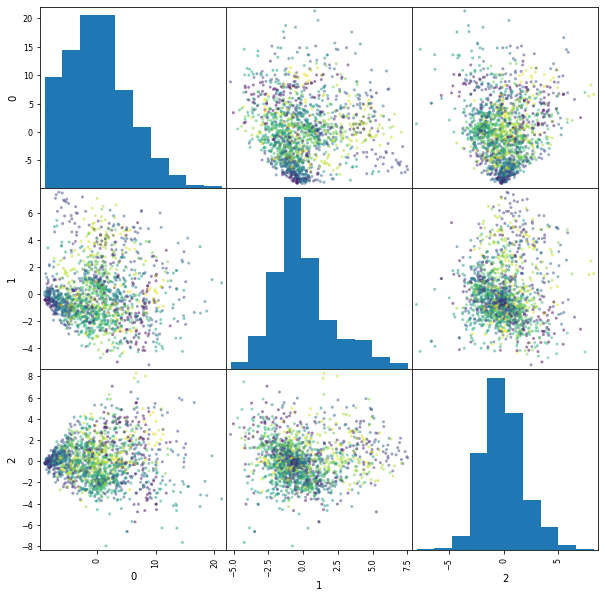

In [165]:
scatter_matrix(X_gts.iloc[:,0:3], figsize = (10,10), grid=True, c=categories_ap)

In [86]:
from sklearn.cluster import OPTICS

In [103]:
clustering_op = OPTICS()
clustering_op.fit(gts_pca.iloc[:,0:10])

OPTICS()

In [104]:
categories_op = clustering_op.labels_
categories_op

array([-1, -1, -1, ..., -1, -1,  2])

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>]], dtype=object)

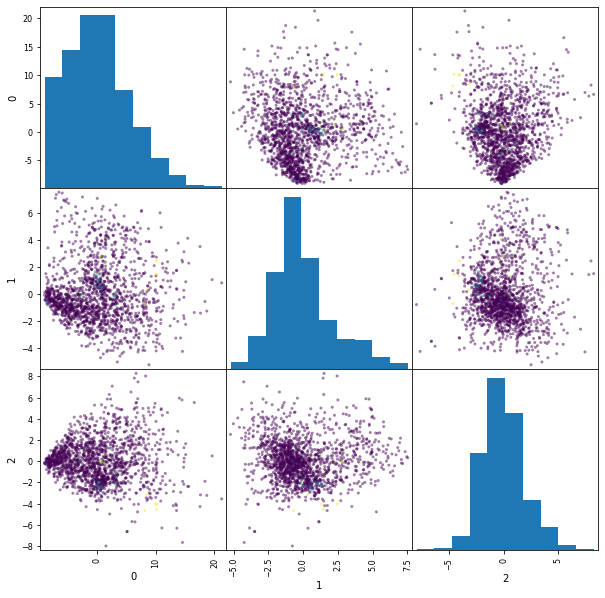

In [119]:
scatter_matrix(gts_pca.iloc[:,0:3], figsize = (10,10), grid=True, c=categories_op)